In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salary_data.csv')


In [3]:
df.shape


(30, 2)

In [4]:
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.dtypes


YearsExperience    float64
Salary             float64
dtype: object

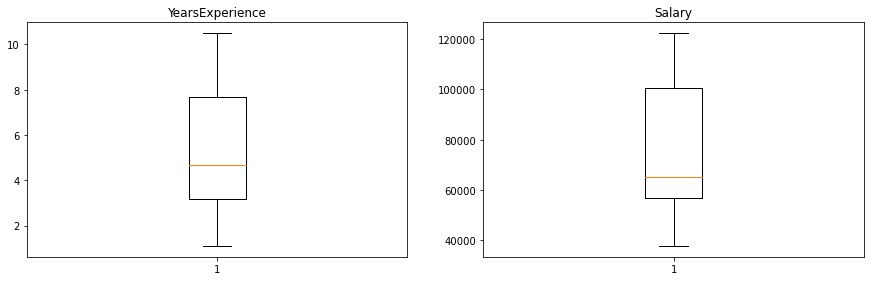

In [7]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(5,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1
        
plt.show()

In [8]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
X.shape


(30, 1)

In [11]:
y.shape


(30,)

In [12]:
y = y.reshape(-1,1)


In [13]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [16]:

mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)

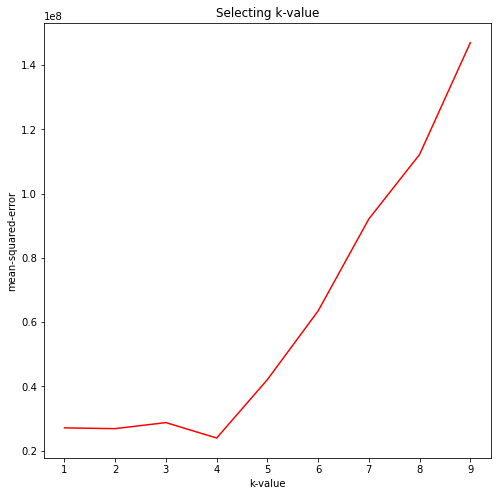

In [17]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [18]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [19]:
r2_score(y_test,y_pred)


0.9752441632578137